<ipython-input-17-e36e10da518f>:68: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= -3, cmap= 'viridis', anpha= 0.5)
<ipython-input-17-e36e10da518f>:69: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= -3, cmap= 'viridis', anpha= 0.5)
<ipython-input-17-e36e10da518f>:70: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= -3, cmap= 'viridis', anpha= 0.5)


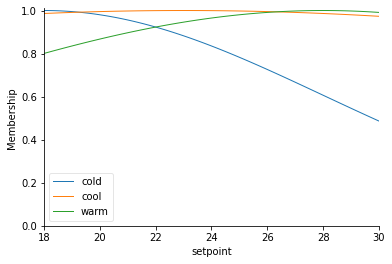

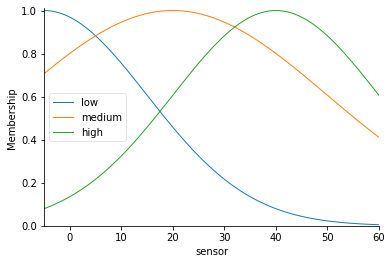

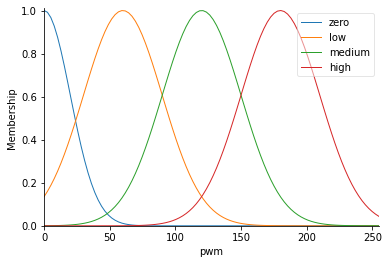

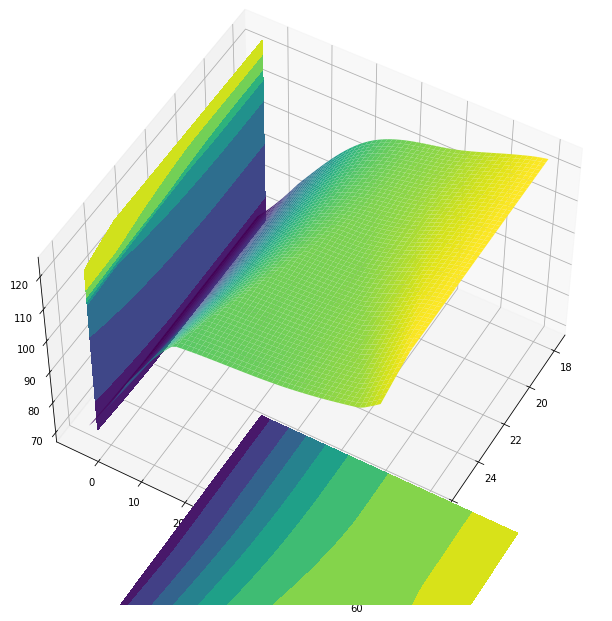

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
#input
universe = np.linspace(18,30, 100) 
universe1 = np.linspace(-5,60,100) #%
#output
universe2 = np.linspace(0,255,100)


setpoint = ctrl.Antecedent(universe, 'setpoint')
sensor = ctrl.Antecedent(universe1, 'sensor')
pwm = ctrl.Consequent(universe2, 'pwm')

#input
setpoint['cold'] = fuzzy.gaussmf(setpoint.universe,18,10)
setpoint['cool'] = fuzzy.gaussmf(setpoint.universe,23,30)
setpoint['warm'] = fuzzy.gaussmf(setpoint.universe,28,15)
setpoint.view()

sensor['low'] = fuzzy.gaussmf(sensor.universe,-5,20)
sensor['medium'] = fuzzy.gaussmf(sensor.universe,20,30)
sensor['high'] = fuzzy.gaussmf(sensor.universe,40,20)
sensor.view()

#output
pwm['zero'] = fuzzy.gaussmf(pwm.universe,0,20)
pwm['low'] = fuzzy.gaussmf(pwm.universe,60,30)
pwm['medium'] = fuzzy.gaussmf(pwm.universe,120,30)
pwm['high'] = fuzzy.gaussmf(pwm.universe,180,30)
pwm.view()

#rule
rule_0 = ctrl.Rule(antecedent = ((setpoint['cold'] & sensor['low']) | 
                                 (setpoint['cool'] & sensor['low']) | 
                                 (setpoint['warm'] & sensor['low'])| 
                                 (setpoint['cool'] & sensor['medium'])| 
                                 (setpoint['warm'] & sensor['medium'])), consequent = pwm['zero'])

rule_1 = ctrl.Rule(antecedent = ((setpoint['cold'] & sensor['medium'])), consequent = pwm['low'])

rule_2 = ctrl.Rule(antecedent = ((setpoint['cool'] & sensor['high']) | 
                                 (setpoint['warm'] & sensor['high'])), consequent = pwm['medium'])

rule_3 = ctrl.Rule(antecedent = ((setpoint['cold'] & sensor['high'])), consequent = pwm['high'])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

System  = ctrl.ControlSystem(rules = [rule_0, rule_1, rule_2, rule_3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(18,30,61)
upSampled2 = np.linspace(-5,60,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['setpoint']= x[i,j]
    sim.input['sensor']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['pwm']

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= -3, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= -3, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= -3, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)



In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4cf0c82be2db644fa92ca9ba2fb058e561b9b0cab4bb57f50f9d0464b1a5fa84
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
